# Loan Eligibility Prediction

In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
credit_data = pd.read_csv("Credit_Risk_XTrain.csv",na_values=('?',"#",'',' '))

In [3]:
credit_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
credit_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
credit_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Preprocessing


##     Part 1 - Handling Missing Value

In [7]:
# "Gender" column
credit_data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
credit_data.Gender.mode()

0    Male
Name: Gender, dtype: object

In [9]:
credit_data['Gender'].fillna("Male", inplace=True)

In [10]:
# "Married" column

In [11]:
credit_data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [12]:
credit_data['Married'].mode()

0    Yes
Name: Married, dtype: object

In [13]:
credit_data['Married'].fillna("Yes", inplace=True)

In [14]:
# "Dependents" column

In [15]:
credit_data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [16]:
credit_data['Dependents'].mode()

0    0
Name: Dependents, dtype: object

In [17]:
credit_data['Dependents'].fillna("0", inplace=True)

In [18]:
# "Self_Employed" column

In [19]:
credit_data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [20]:
credit_data[credit_data["Self_Employed"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
107,LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,LP001398,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,LP001546,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y


In [21]:
credit_data["Self_Employed"].fillna("No", inplace=True)

In [22]:
# Loan amount

In [23]:
credit_data["LoanAmount"].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [24]:
credit_data[credit_data["LoanAmount"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,No,6782,0.0,NaN,360.0,NaN,Urban,N
102,LP001350,Male,Yes,0,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


In [25]:
credit_data.LoanAmount.mean()

146.41216216216216

In [26]:
credit_data.LoanAmount.describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [27]:
credit_data["LoanAmount"].fillna(credit_data['LoanAmount'].mean(), inplace=True)

In [28]:
# Loan_Amount_Term

In [29]:
credit_data["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [30]:
credit_data["Loan_Amount_Term"].fillna(value=credit_data['Loan_Amount_Term'].mode()[0], inplace=True)

In [31]:
credit_data["Loan_Amount_Term"].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [32]:
# Credit_History       

In [33]:
credit_data["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [34]:
credit_data["Credit_History"].mode()

0    1.0
Name: Credit_History, dtype: float64

In [35]:
credit_data[credit_data["Credit_History"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.000000,240.0,NaN,Urban,Y
24,LP001052,Male,Yes,1,Graduate,No,3717,2925.0,151.000000,360.0,NaN,Semiurban,N
30,LP001091,Male,Yes,1,Graduate,No,4166,3369.0,201.000000,360.0,NaN,Urban,N
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.000000,360.0,NaN,Urban,Y
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.000000,360.0,NaN,Semiurban,Y
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.000000,360.0,NaN,Semiurban,N
86,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.000000,360.0,NaN,Semiurban,Y
95,LP001326,Male,No,0,Graduate,No,6782,0.0,146.412162,360.0,NaN,Urban,N
117,LP001405,Male,Yes,1,Graduate,No,2214,1398.0,85.000000,360.0,NaN,Urban,Y
125,LP001443,Female,No,0,Graduate,No,3692,0.0,93.000000,360.0,NaN,Rural,Y


In [36]:
credit_data["Credit_History"].fillna(value=credit_data["Credit_History"].mode()[0] , inplace=True)

In [37]:
credit_data["Credit_History"].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [38]:
credit_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [39]:
credit_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Part 2 - Encoding
    * a) Label encoder 
    * b) One Hot Encoder 
    * c) dummy variable (n-1)

In [40]:
credit_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [41]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [42]:
# DROPPING "loan Id" column
credit_data.drop("Loan_ID", axis=1, inplace=True)

In [43]:
for col in credit_data:
    print(credit_data[col].value_counts())
    print("*"*50)

Male      502
Female    112
Name: Gender, dtype: int64
**************************************************
Yes    401
No     213
Name: Married, dtype: int64
**************************************************
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
**************************************************
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
**************************************************
No     532
Yes     82
Name: Self_Employed, dtype: int64
**************************************************
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
**************************************************
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64
****************************

In [44]:
credit_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [45]:
# Label encoder on the following columns:
list1 = ["Gender","Married","Education","Self_Employed","Loan_Status"]
for value in list1:
    credit_data[value] = credit_data[value].astype('category')
    credit_data[value] = credit_data[value].cat.codes

# One hot encoder on the following column:
credit_data = pd.get_dummies(credit_data, columns=['Property_Area'])
# Drooping dummy variable column
#credit_data = credit_data.drop(['Property_Area'], axis=1)

In [46]:
credit_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,1,0,0,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,1,0,0,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,1,0,0,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,1,0,0,1


In [47]:
# Replacing value "3+" in "Dependents" column with "3"

In [48]:
credit_data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [49]:
credit_data[credit_data['Dependents']=="3+"]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
7,1,1,3+,0,0,3036,2504.0,158.000000,360.0,0.0,0,0,1,0
34,1,0,3+,0,0,12500,3000.0,320.000000,360.0,1.0,0,1,0,0
61,1,1,3+,0,0,3029,0.0,99.000000,360.0,1.0,1,0,0,1
68,1,1,3+,1,1,7100,0.0,125.000000,60.0,1.0,1,0,0,1
73,1,1,3+,1,0,4755,0.0,95.000000,360.0,0.0,0,0,1,0
74,1,1,3+,0,1,5266,1774.0,187.000000,360.0,1.0,1,0,1,0
78,1,1,3+,0,0,3167,4000.0,180.000000,300.0,0.0,0,0,1,0
79,1,1,3+,1,1,3333,2166.0,130.000000,360.0,1.0,1,0,1,0
109,1,1,3+,1,0,2071,754.0,94.000000,480.0,1.0,1,0,1,0
126,1,1,3+,0,0,23803,0.0,370.000000,360.0,1.0,1,1,0,0


In [50]:
credit_data['Dependents'].replace("3+","3", inplace=True)

In [51]:
credit_data['Dependents']=credit_data['Dependents'].astype('int64')

In [52]:
credit_data['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [53]:
credit_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,1,0,0,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,1,0,0,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,1,0,0,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,1,0,0,1


## Part = 3 - Handling Outliers

<AxesSubplot:>

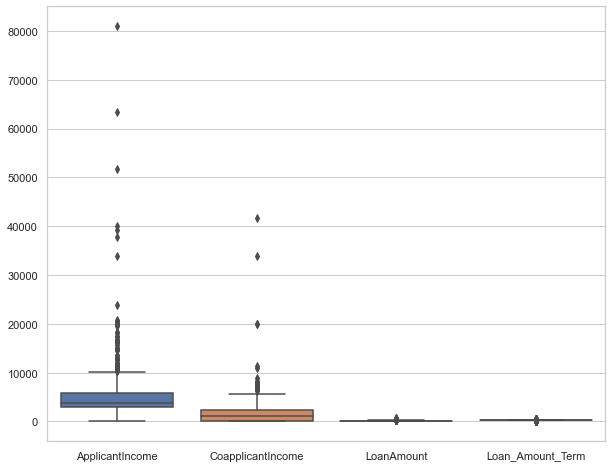

In [54]:
# plotting boxplot for finding outliers
%matplotlib inline
sns.set(style='whitegrid')
fi,ax=plt.subplots(figsize=(10,8))
sns.boxplot(data=credit_data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])


In [55]:
# Observation: outliers are present in the columns "Applicantincome" and "Coapplicantincome"

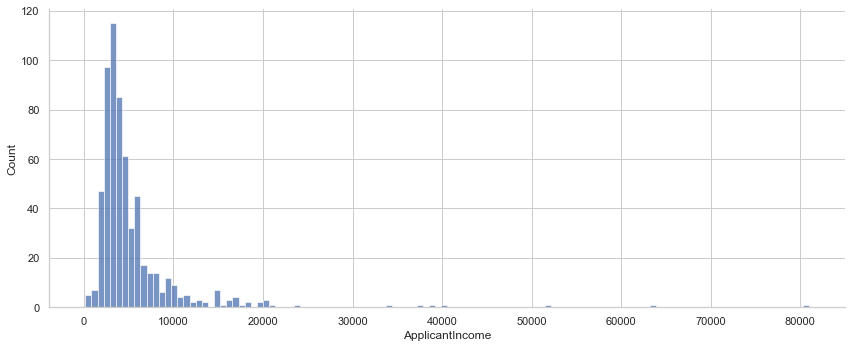

In [56]:
# Histogram of "ApplicantIncome" before removing outliers
sns.displot(data=credit_data,x="ApplicantIncome",kind="hist",aspect=2.4)

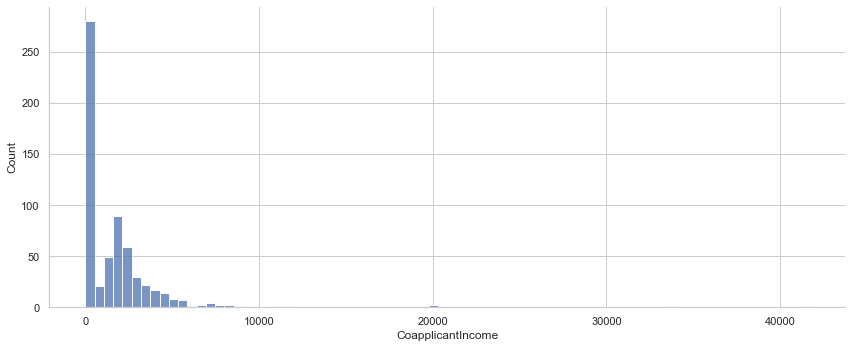

In [57]:
# Histogram of "CoapplicantIncome" before removing outliers
sns.displot(data=credit_data,x="CoapplicantIncome",kind="hist",aspect=2.4)

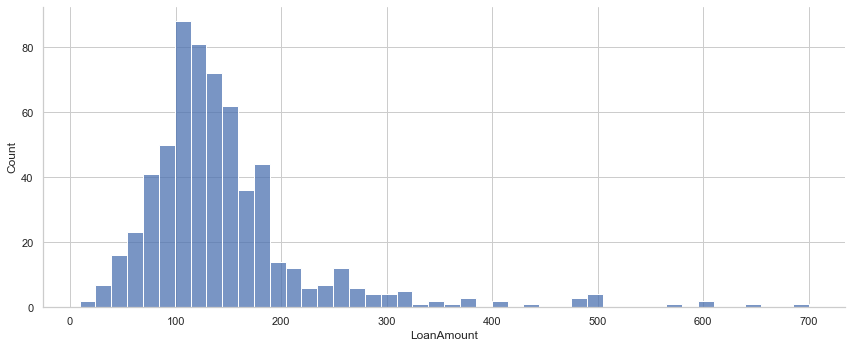

In [58]:
# Histogram of "LoanAmount" after removing outliers
sns.displot(data=credit_data,x="LoanAmount",kind="hist",aspect=2.4)

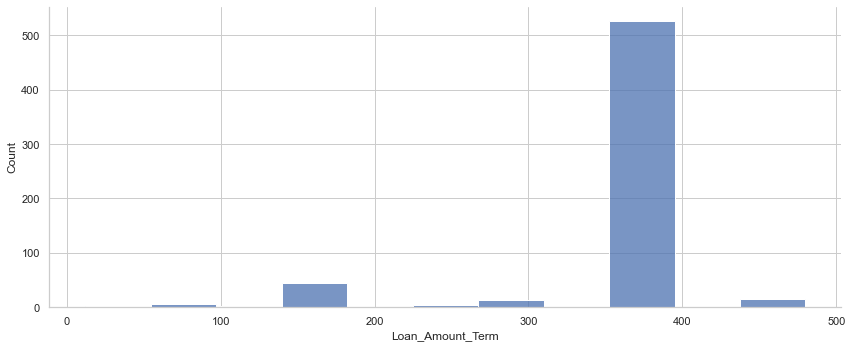

In [59]:
# Histogram of "Loan_Amount_Term" after removing outliers
sns.displot(data=credit_data,x="Loan_Amount_Term",kind="hist",aspect=2.4)

In [60]:
credit_data.ApplicantIncome.describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [61]:
credit_data.CoapplicantIncome.describe().describe()

count        8.000000
mean      6289.280521
std      14332.564054
min          0.000000
25%        460.500000
50%       1404.872899
75%       2454.499592
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [62]:
# Replacing outliers with median
#function to return a list of index of outliers
column_list = ['ApplicantIncome','CoapplicantIncome']
for feature in column_list:
    Q1= credit_data[feature].quantile(0.25)
    Q3 =credit_data[feature].quantile(0.75)
    IQR = Q3 - Q1

    
    
    lower_limit = Q1 - 1.5 * IQR

    
    upper_limit = Q3 + 1.5 * IQR
 
  
    
    median = credit_data[feature].median()

    
    credit_data[feature] = np.where(credit_data[feature]< lower_limit, median,credit_data[feature])
    credit_data[feature] = np.where(credit_data[feature]> upper_limit, median,credit_data[feature])

<AxesSubplot:>

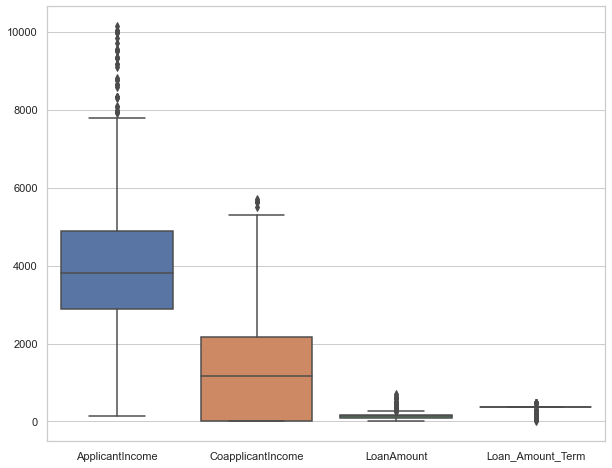

In [63]:
# plotting boxplot after removing outliers
%matplotlib inline
sns.set(style='whitegrid')
fi,ax=plt.subplots(figsize=(10,8))
sns.boxplot(data=credit_data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])

In [64]:
credit_data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,4099.298046,1286.179023,146.412162,342.410423,0.855049,0.687296,0.291531,0.379479,0.328990
std,0.386497,0.476373,1.009623,0.413389,0.340446,1848.706334,1440.204497,84.037468,64.428629,0.352339,0.463973,0.454838,0.485653,0.470229
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.250000,1177.750000,129.000000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,4880.000000,2159.250000,164.750000,360.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,10139.000000,5701.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000


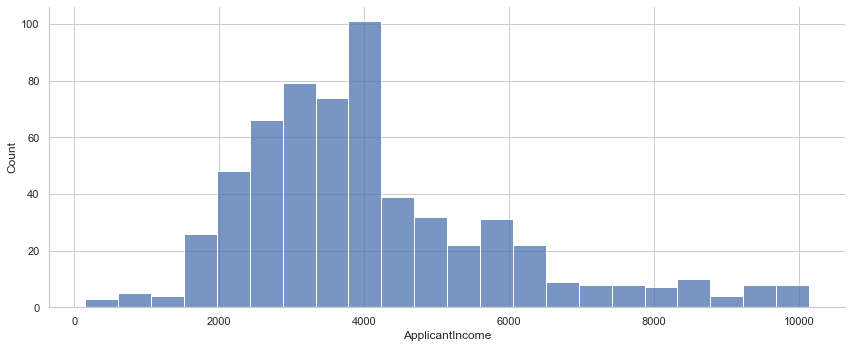

In [65]:
# # Histogram of "ApplicantIncome" after removing outliers
sns.displot(data=credit_data,x="ApplicantIncome",kind="hist",aspect=2.4)

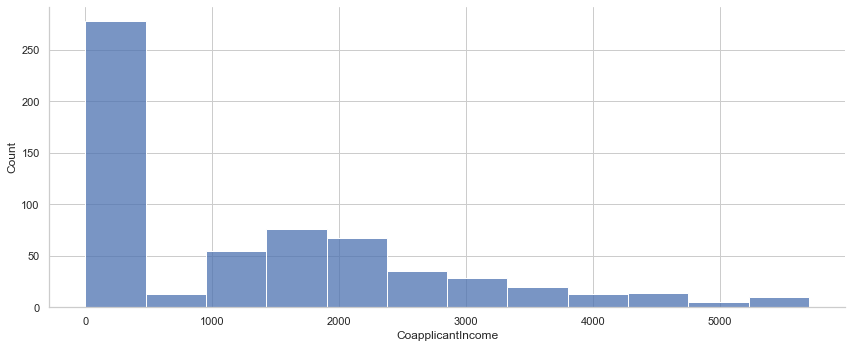

In [66]:
# Histogram of "CoapplicantIncome" after removing outliers
sns.displot(data=credit_data,x="CoapplicantIncome",kind="hist",aspect=2.4)

## Part 4 - feature scalling - Standarisation

In [68]:
X=credit_data.drop("Loan_Status", axis=1)
y=credit_data["Loan_Status"]

In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

## Part 5 : Imbalance dataset

In [73]:
credit_data.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [75]:
# using imblearn to removing imablance in our dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X, y)
print(x_smote.shape)
print(y_smote.shape)

(844, 13)
(844,)


In [76]:
credit_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,5849.0,0.0,146.412162,360.0,1.0,1,0,0,1
1,1,1,1,0,0,4583.0,1508.0,128.000000,360.0,1.0,0,1,0,0
2,1,1,0,0,1,3000.0,0.0,66.000000,360.0,1.0,1,0,0,1
3,1,1,0,1,0,2583.0,2358.0,120.000000,360.0,1.0,1,0,0,1
4,1,0,0,0,0,6000.0,0.0,141.000000,360.0,1.0,1,0,0,1


# We are ready to split the data into training and test for building model and prediction

In [79]:
X

array([[ 0.47234264, -1.37208932, -0.73780632, ..., -0.64147818,
        -0.7820157 ,  1.42814704],
       [ 0.47234264,  0.72881553,  0.25346957, ...,  1.55889948,
        -0.7820157 , -0.70020801],
       [ 0.47234264,  0.72881553, -0.73780632, ..., -0.64147818,
        -0.7820157 ,  1.42814704],
       ...,
       [ 0.47234264,  0.72881553,  0.25346957, ..., -0.64147818,
        -0.7820157 ,  1.42814704],
       [ 0.47234264,  0.72881553,  1.24474546, ..., -0.64147818,
        -0.7820157 ,  1.42814704],
       [-2.11710719, -1.37208932, -0.73780632, ..., -0.64147818,
         1.2787467 , -0.70020801]])

In [80]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int8

# Building Model

In [81]:
# model evaluation
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

# Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [83]:
y_pred_logit_train = logit.predict(X_train)
y_pred_logit_test = logit.predict(X_test)

In [84]:
print(accuracy_score(y_train, y_pred_logit_train))
print("####"*30)
print(accuracy_score(y_test, y_pred_logit_test))

0.8126272912423625
########################################################################################################################
0.7886178861788617


# DecisionTree

In [85]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [86]:
y_pred_dt_train = dt.predict(X_train)
y_pred_dt_test = dt.predict(X_test)

In [87]:
print(accuracy_score(y_train, y_pred_logit_train))
print("####"*30)
print(accuracy_score(y_test, y_pred_logit_test))

0.8126272912423625
########################################################################################################################
0.7886178861788617


# XGBoost

In [88]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [89]:
y_pred_xgb_train = xgb.predict(X_train)
y_pred_xgb_test = xgb.predict(X_test)

In [90]:
print(accuracy_score(y_train, y_pred_xgb_train))
print("####"*30)
print(accuracy_score(y_test, y_pred_xgb_test))

0.9979633401221996
########################################################################################################################
0.7479674796747967


# Adaboost 

In [91]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [92]:
y_pred_ada_train = ada.predict(X_train)
y_pred_ada_test = ada.predict(X_test)

In [93]:
print(accuracy_score(y_train, y_pred_ada_train))
print("####"*30)
print(accuracy_score(y_test, y_pred_ada_test))

0.8533604887983707
########################################################################################################################
0.7398373983739838


# Gradient Boosting 

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
gdboost = GradientBoostingClassifier()
gdboost.fit(X_train, y_train)

GradientBoostingClassifier()

In [95]:
y_pred_gdb_train = gdboost.predict(X_train)
y_pred_gdb_test = gdboost.predict(X_test)

In [96]:
print(accuracy_score(y_train, y_pred_gdb_train))
print("####"*30)
print(accuracy_score(y_test, y_pred_gdb_test))

0.8920570264765784
########################################################################################################################
0.7398373983739838


# RandomForest 

In [97]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)

RandomForestClassifier()

In [98]:
y_pred_rf_train = rforest.predict(X_train)
y_pred_rf_test = rforest.predict(X_test)

In [99]:
print(confusion_matrix(y_train, y_pred_rf_train))
print("####"*30)
print(confusion_matrix(y_test, y_pred_rf_test))

[[149   0]
 [  0 342]]
########################################################################################################################
[[18 25]
 [ 3 77]]


In [100]:
print(accuracy_score(y_train, y_pred_rf_train))
print("####"*30)
print(accuracy_score(y_test, y_pred_rf_test))

1.0
########################################################################################################################
0.7723577235772358


## Bagging Classifier Model

In [101]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier()
bagging.fit(X_train, y_train)

BaggingClassifier()

In [102]:
y_pred_train = bagging.predict(X_train)
y_pred_test = bagging.predict(X_test)

In [103]:
print(accuracy_score(y_train, y_pred_train))
print("####"*30)
print(accuracy_score(y_test, y_pred_test))

0.9796334012219959
########################################################################################################################
0.7398373983739838
